# Task 2: Advanced Analysis of Brent Oil Prices

In this notebook, we will apply advanced statistical and econometric models to analyze the historical Brent oil prices dataset. Building upon our previous insights, we aim to identify patterns, understand how various factors influence oil prices, and examine potential models for accurate forecasting. This analysis includes:

- Advanced time series modeling (VAR, regime-switching models)
- Economic indicators and their relationship with oil prices
- LSTM-based models for detecting patterns in the data

In [ ]:
# Importing essential libraries for Task 2 analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import VAR
# from sklearn.preprocessing import StandardScaler
import os
os.chdir(r'c:\users\ermias.tadesse\10x\Oil-Price-Insights\src\data_analysis')
from eda_utils import EDA

os.chdir(r'c:\users\ermias.tadesse\10x\Oil-Price-Insights')  # Set the working directory to the project root
# Load the Brent Oil Prices dataset
file_path = 'Data/Raw/BrentOilPrices.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'], format='mixed')
# data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')
data.set_index('Date', inplace=True)
data.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


## Exploratory Data Analysis (EDA)

To begin the advanced analysis, we’ll perform EDA on the Brent oil prices dataset. This step includes:

- Plotting historical trends in oil prices
- Calculating moving averages to observe longer-term trends
- Examining any seasonality or volatility in price data
- Exploring correlations with other economic indicators (to be added later)


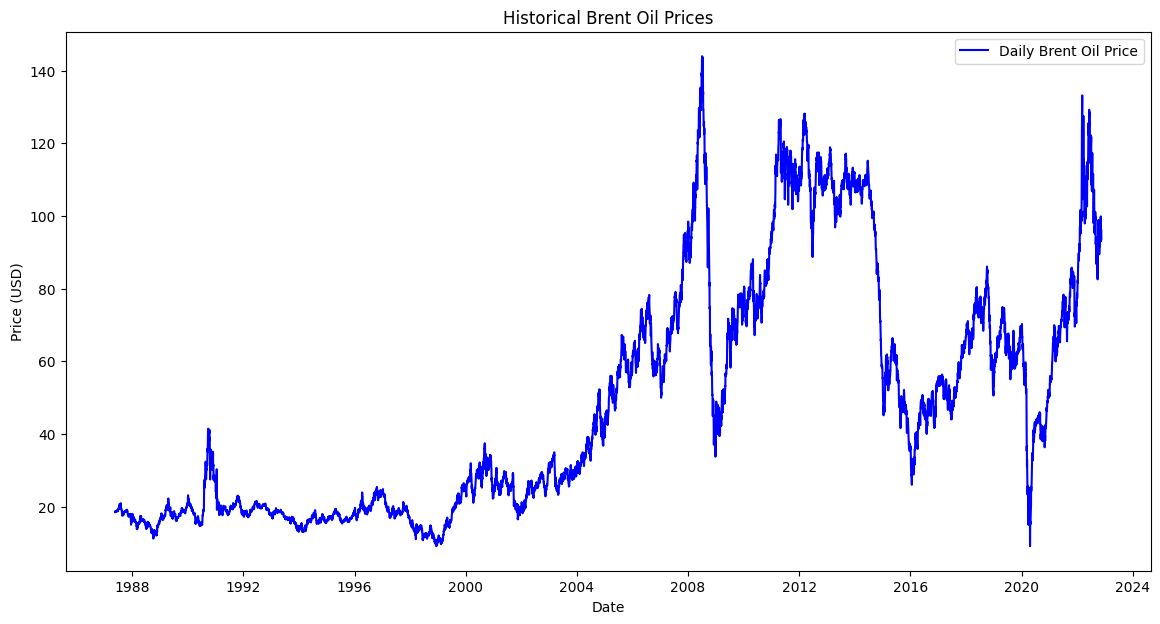

In [2]:
# Plotting Brent oil price over time to observe initial trends
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Price'], color='blue', label='Daily Brent Oil Price')
plt.title("Historical Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

### Calculating and Plotting Moving Average

To observe the long-term trends in Brent oil prices, we will calculate a moving average. This helps smooth out daily fluctuations and highlights broader trends over time.


c:\users\ermias.tadesse\10x\Oil-Price-Insights\src\data_analysis


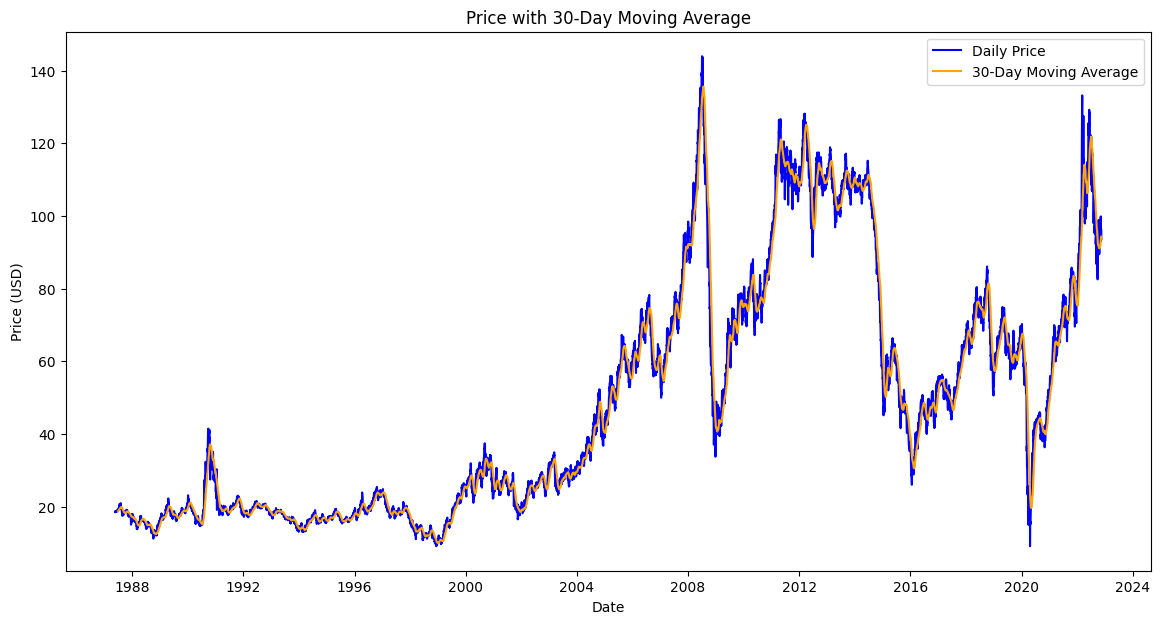

In [ ]:
# Importing custom EDA utilities

# Import the EDA class
print(os.getcwd()) 


# Instantiate the EDA class with the data
eda = EDA(data)

# Plot the 30-day moving average using the class method
eda.plot_moving_average(column='Price', window=30)
